# test_d23b.ipynb
Test the functions contained in d23b.py, often using their default parameters.

Author: Benjamin S. Grandey, 2023

In [1]:
import datetime
import d23b
import matplotlib.pyplot as plt

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

## Watermark

In [3]:
print(d23b.get_watermark())

Python implementation: CPython
Python version       : 3.10.11
IPython version      : 8.13.2

matplotlib   : 3.7.1
numpy        : 1.24.3
pandas       : 2.0.2
pyvinecopulib: 0.6.3
scipy        : 1.10.1
seaborn      : 0.12.2
xarray       : 2023.5.0

conda environment: d23b-ice-dependence

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit


## Data

### AR6 samples

In [4]:
%%time
samples_da = d23b.read_ar6_samples()
samples_da

CPU times: user 124 ms, sys: 22.1 ms, total: 146 ms
Wall time: 152 ms


<xarray.DataArray 'sea_level_change' (samples: 20000)>
array([ 0.033,  0.056,  0.021, ..., -0.005, -0.018, -0.005])
Coordinates:
    years    int32 2100
  * samples  (samples) int64 0 1 2 3 4 5 ... 19994 19995 19996 19997 19998 19999
Attributes:
    units:    m

### Antarctic ISM ensembles

In [5]:
%%time
ism_df = d23b.read_ism_ensemble_data()
ism_df

CPU times: user 9.55 s, sys: 859 ms, total: 10.4 s
Wall time: 10.5 s


,WAIS,EAIS,Group,Notes
0,-0.029648,-0.023720,P21,B1_AWI_PISM1
1,0.022744,0.010322,P21,B1_NCAR_CISM
2,0.007252,-0.020039,P21,B3_AWI_PISM1
3,0.078800,0.027450,P21,B3_NCAR_CISM
4,0.013104,-0.043617,P21,B4_AWI_PISM1
5,0.034448,0.001055,P21,B4_NCAR_CISM
6,-0.031954,-0.023385,P21,B5_AWI_PISM1
7,0.047175,0.024530,P21,B5_NCAR_CISM
8,-0.022967,-0.019902,P21,B6_AWI_PISM1
9,-0.015849,-0.017969,P21,B6_PIK_SICOPOLIS1


### FACTS data (gauge info, GRD)

In [6]:
%%time
gauge_info = d23b.read_gauge_info()
gauge_info

CPU times: user 26.2 ms, sys: 4.65 ms, total: 30.9 ms
Wall time: 29.8 ms


{'gauge_name': 'TANJONG_PAGAR', 'gauge_id': 1746, 'lat': 1.27, 'lon': 103.85}

In [7]:
%%time
gauge_grd = d23b.read_gauge_grd()
gauge_grd

CPU times: user 185 ms, sys: 28.1 ms, total: 213 ms
Wall time: 216 ms


{'gauge_name': 'TANJONG_PAGAR',
 'gauge_id': 1746,
 'lat': 1.27,
 'lon': 103.85,
 'lat_grd': 1.2280701398849487,
 'lon_grd': 103.85964965820312,
 'EAIS': 1.1081630364060402,
 'WAIS': 1.142452354542911,
 'GIS': 1.1161844013258815,
 'GrIS': 1.1161844013258815}

In [8]:
%%time
grd_df = d23b.get_grd_df()
grd_df.round(2)

CPU times: user 509 ms, sys: 66.6 ms, total: 575 ms
Wall time: 608 ms


,EAIS,WAIS,GrIS
REYKJAVIK,1.11,1.17,-1.70
DUBLIN,1.10,1.12,-0.04
TANJONG_PAGAR,1.11,1.14,1.12


## Methods

### Quantile function containing samples

In [9]:
%%time
qf_da = d23b.get_component_qf()
qf_da

CPU times: user 82.9 ms, sys: 9.54 ms, total: 92.5 ms
Wall time: 91.7 ms


<xarray.DataArray 'sea_level_change' (p: 20000)>
array([-0.114, -0.113, -0.113, ...,  0.221,  0.222,  0.222])
Coordinates:
    years    int32 2100
  * p        (p) float64 0.0 5e-05 0.0001 0.00015 ... 0.9998 0.9999 0.9999 1.0
Attributes:
    units:    m

### Modelling marginal distributions using fusion

CPU times: user 17.7 ms, sys: 3.24 ms, total: 21 ms
Wall time: 20.5 ms


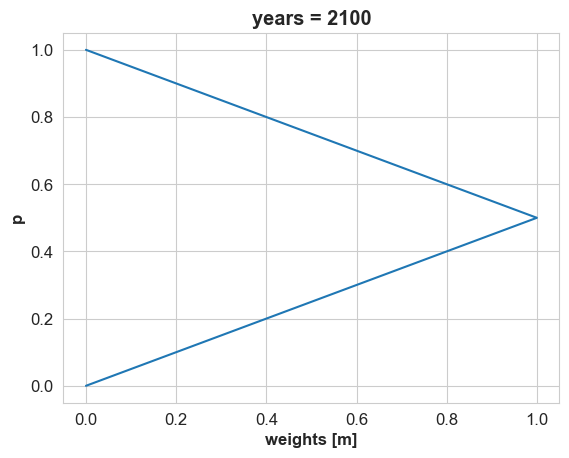

In [10]:
%%time
w_da = d23b.get_fusion_weights()
w_da.plot(y='p')

CPU times: user 240 ms, sys: 31.7 ms, total: 272 ms
Wall time: 273 ms


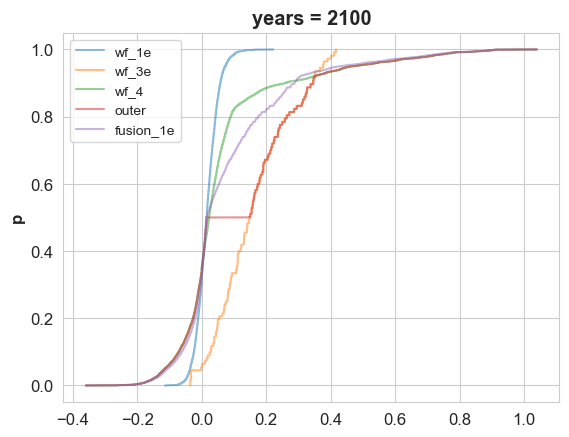

In [11]:
%%time
for workflow in ['wf_1e', 'wf_3e', 'wf_4', 'outer', 'fusion_1e']:
    qf_da = d23b.get_component_qf(workflow=workflow)
    qf_da.plot(y='p', label=workflow, alpha=0.5)
plt.legend()

### Quantifying dependence with bivariate copulas

In [12]:
%%time
bicop = d23b.quantify_bivariate_dependence()
bicop

read_ar6_samples(wf_1e, WAIS, ssp585, 2100): including PEN in WAIS
CPU times: user 339 ms, sys: 25 ms, total: 364 ms
Wall time: 373 ms


<pyvinecopulib.Bicop>
Gumbel 90°, parameters = 1.027

### Modelling dependence using a truncated vine copula

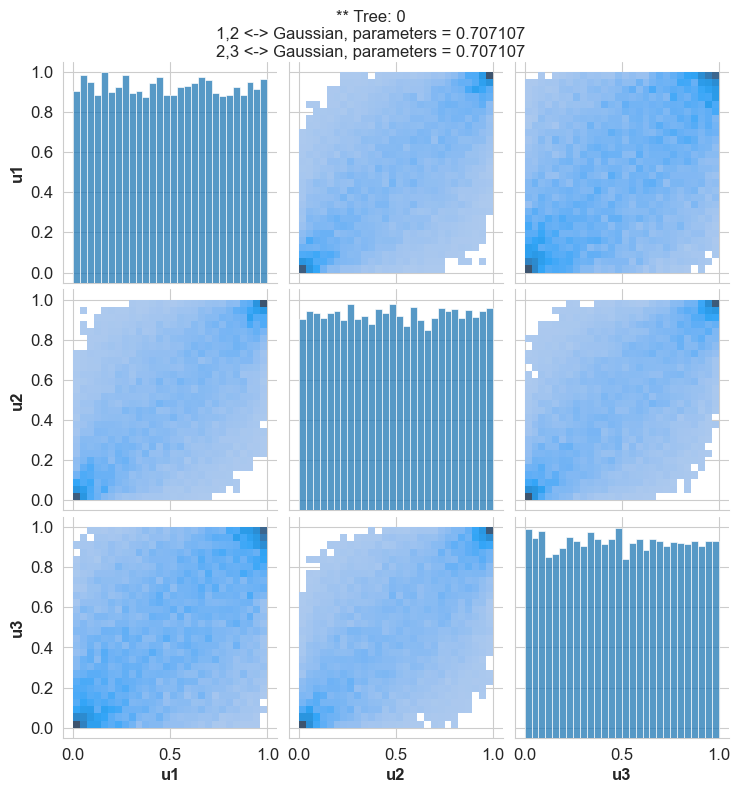

CPU times: user 1.12 s, sys: 14.2 ms, total: 1.14 s
Wall time: 1.34 s


In [13]:
%%time
u_n3 = d23b.sample_dvine_copula(plot=True)

### Sampling the total ice-sheet contribution

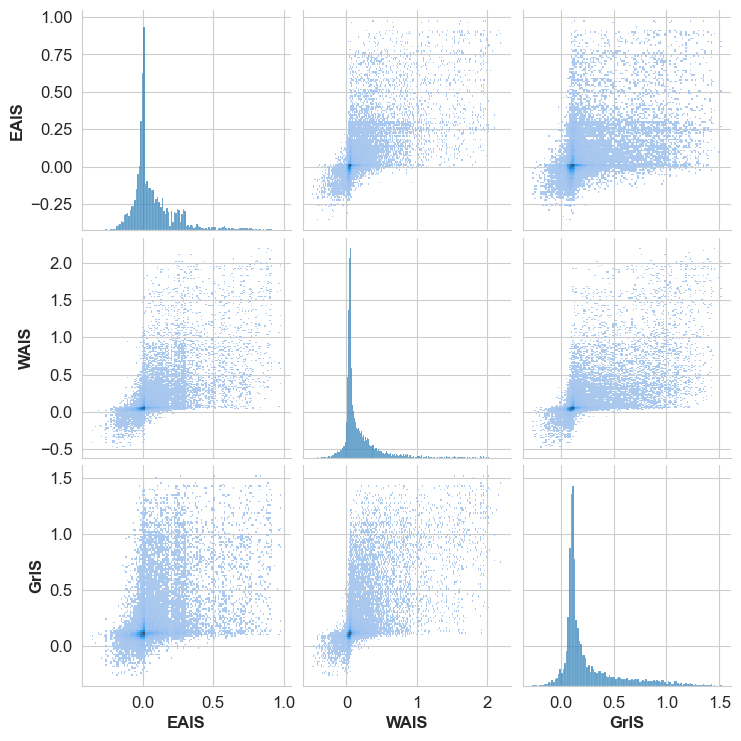

CPU times: user 1.69 s, sys: 63.7 ms, total: 1.75 s
Wall time: 1.76 s


,EAIS,WAIS,GrIS,TOT
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.082261,0.194241,0.252788,0.529289
std,0.175783,0.321209,0.276988,0.659348
min,-0.358990,-0.488778,-0.267998,-0.868339
25%,-0.011045,0.038000,0.097000,0.133318
50%,0.015000,0.068000,0.129000,0.299450
75%,0.135082,0.236336,0.302116,0.713439
max,0.980687,2.207746,1.521833,4.552538


In [14]:
%%time
trivariate_df = d23b.sample_trivariate_distribution(plot=True)
trivariate_df['TOT'] = trivariate_df.sum(axis=1)
trivariate_df.describe()

## Figures

CPU times: user 129 ms, sys: 7.83 ms, total: 137 ms
Wall time: 134 ms


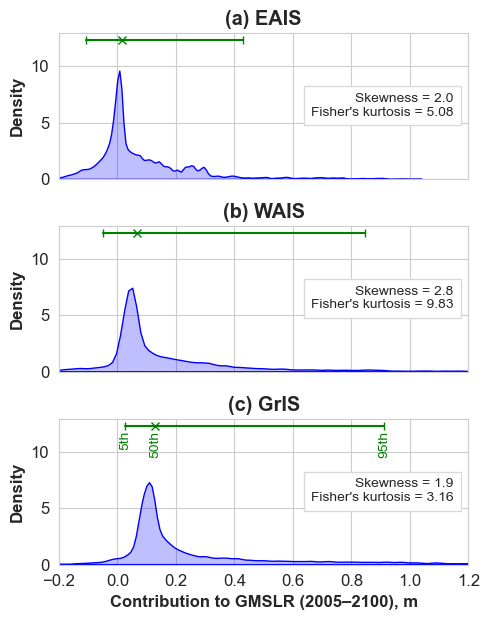

In [15]:
%%time
fig, axs = d23b.fig_component_marginals()

CPU times: user 9.62 s, sys: 857 ms, total: 10.5 s
Wall time: 10.7 s


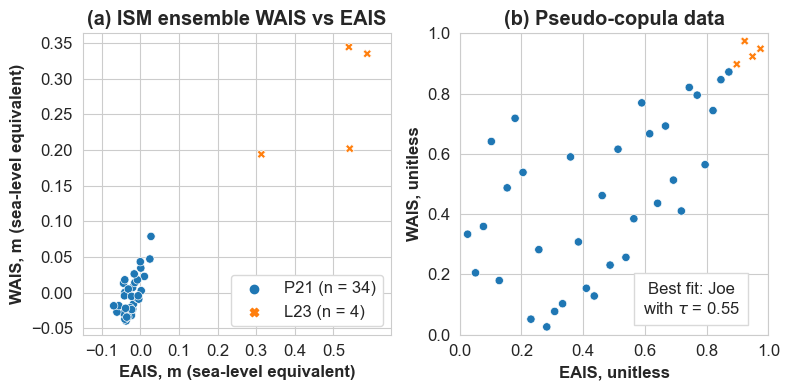

In [16]:
%%time
fig, axs = d23b.fig_ism_ensemble()

CPU times: user 14.6 s, sys: 64.1 ms, total: 14.6 s
Wall time: 14.6 s


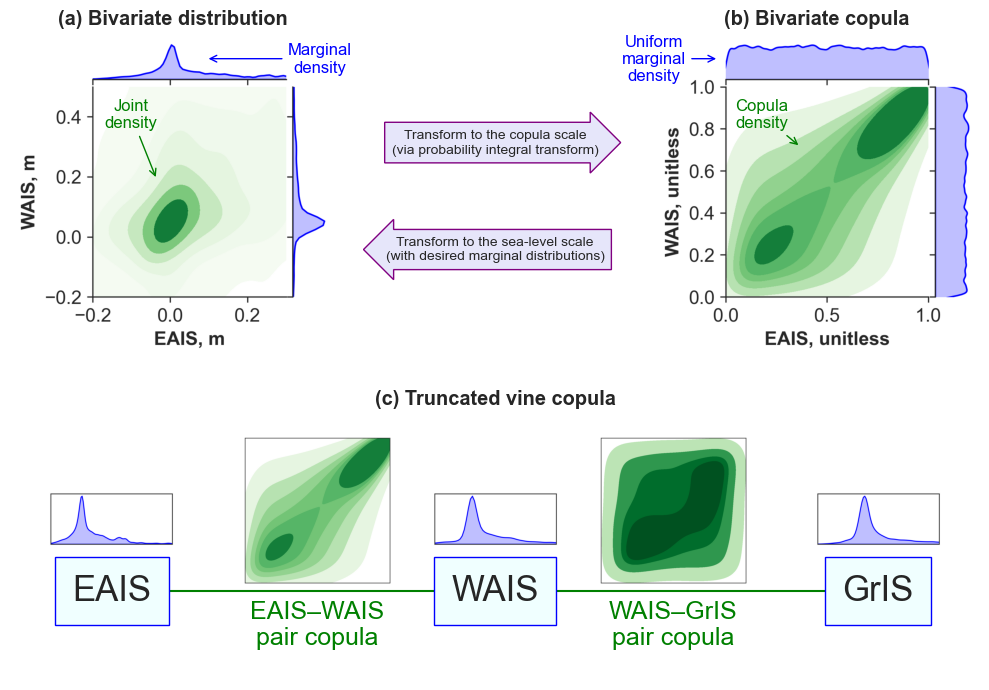

In [17]:
%%time
fig = d23b.fig_illustrate_copula()

CPU times: user 1.24 s, sys: 21.3 ms, total: 1.27 s
Wall time: 1.27 s


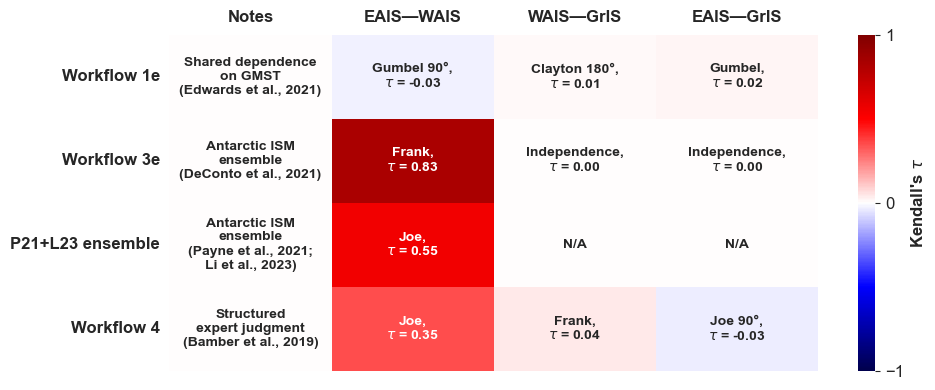

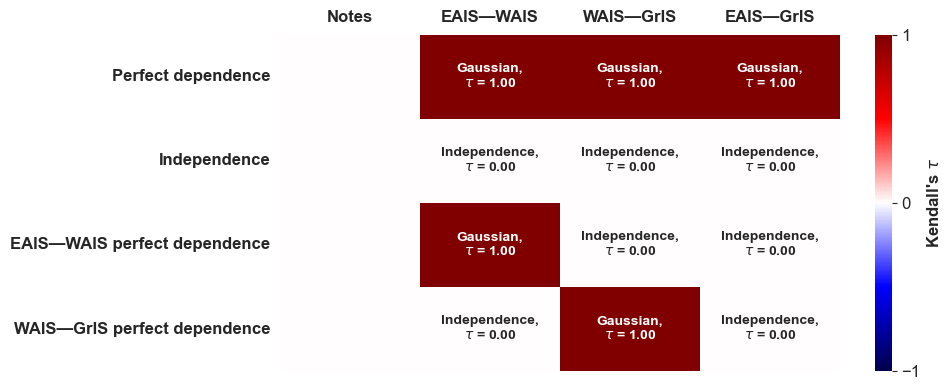

In [18]:
%%time
fig, axs = d23b.fig_dependence_table()
fig, axs = d23b.fig_dependence_table(cop_workflows=('1', '0', '10', '01'))

CPU times: user 10.2 s, sys: 54.8 ms, total: 10.2 s
Wall time: 10.2 s


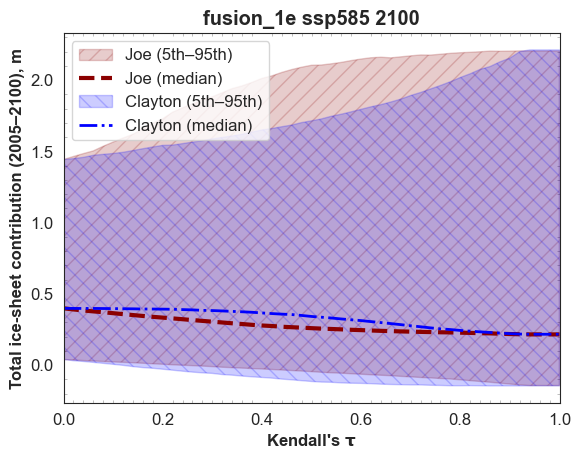

In [19]:
%%time
ax = d23b.ax_total_vs_tau()

CPU times: user 5.25 s, sys: 41.8 ms, total: 5.29 s
Wall time: 5.31 s


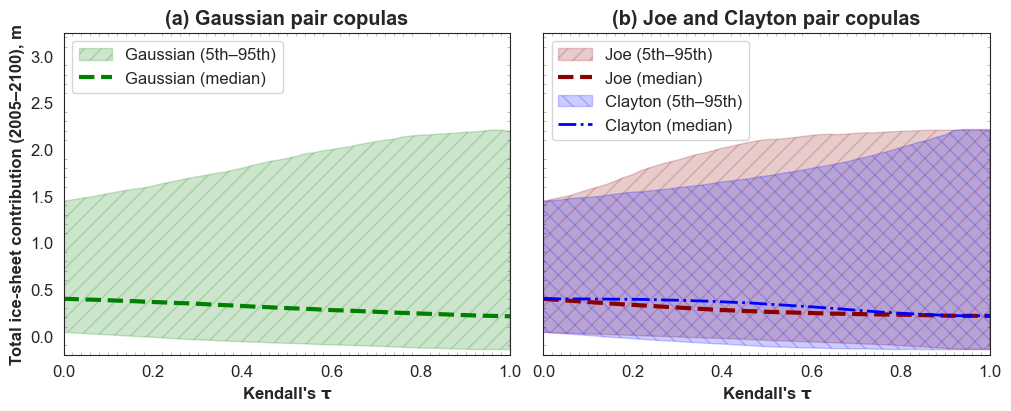

In [20]:
%%time
figs, axs = d23b.fig_total_vs_tau()

read_ar6_samples(wf_1e, WAIS, ssp585, 2020): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2030): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2040): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2050): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2060): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2070): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2080): including PEN in WAIS
read_ar6_samples(wf_1e, WAIS, ssp585, 2090): including PEN in WAIS
CPU times: user 8.32 s, sys: 625 ms, total: 8.95 s
Wall time: 8.96 s


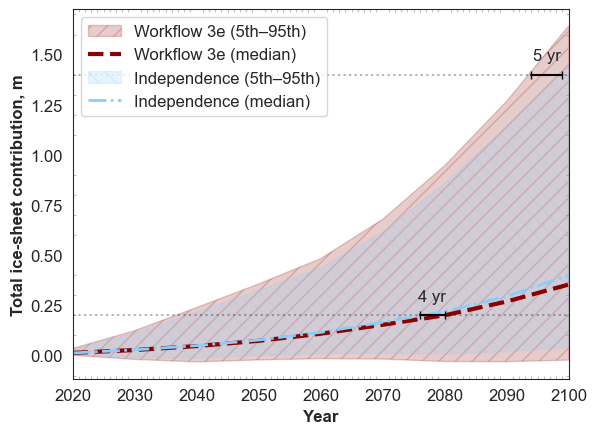

In [21]:
%%time
ax = d23b.ax_total_vs_time()

No WAIS-WAIS dependence found for P21+L23; using independence
CPU times: user 2.68 s, sys: 11 ms, total: 2.69 s
Wall time: 2.69 s


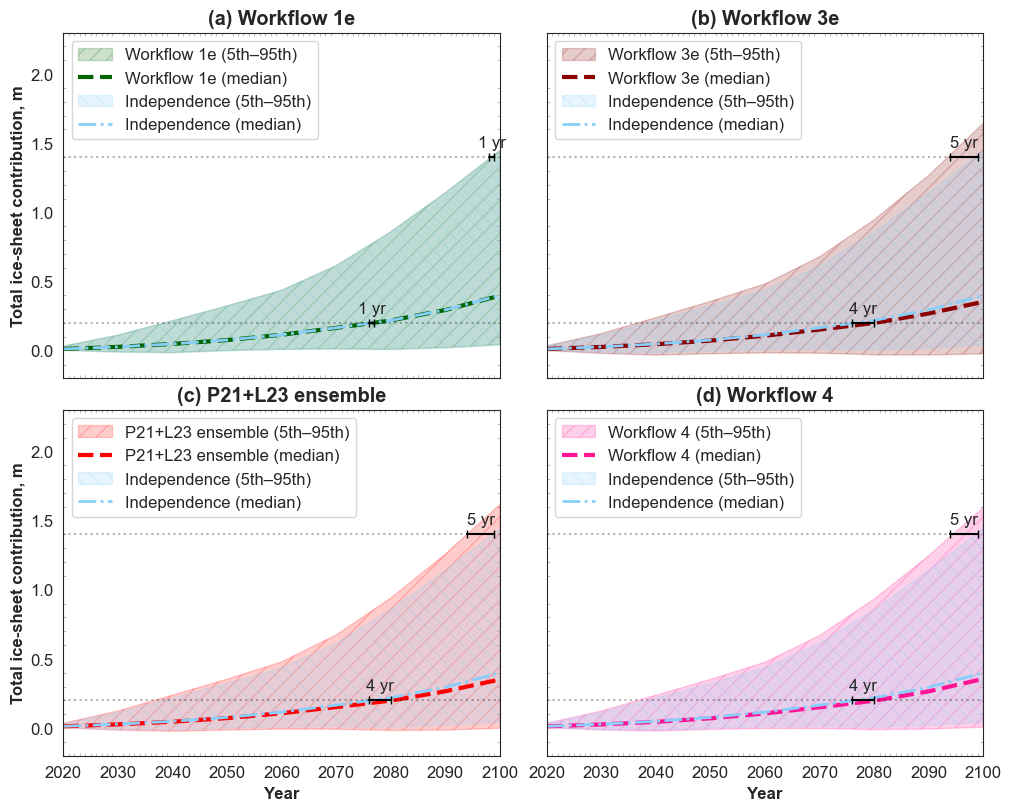

In [22]:
%%time
fig, axs = d23b.fig_total_vs_time()

CPU times: user 264 ms, sys: 3.42 ms, total: 267 ms
Wall time: 266 ms


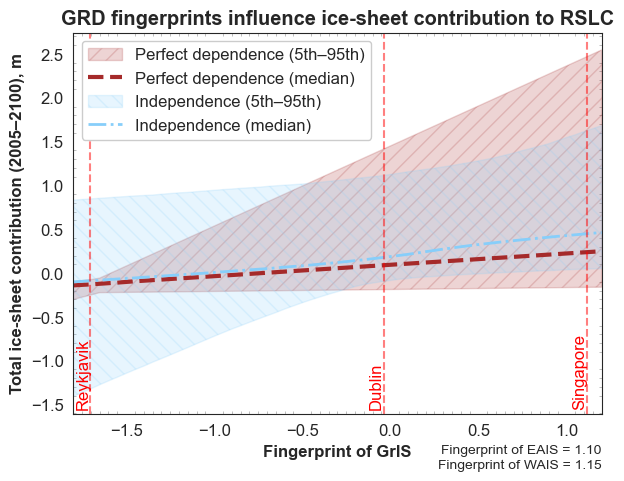

In [23]:
%%time
ax = d23b.ax_sum_vs_gris_fingerprint()

In [24]:
_ = d23b.name_save_fig(fig, fso='o')

Written o01.pdf (0.04 MB)
Written o01.png (0.60 MB)


## Timing info

In [25]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2023-12-22 12:35:44
End:       2023-12-22 12:37:00
Wall time: 76 s
